# Hypothesis Testing in Healthcare: Drug Safety

A pharmaceutical company GlobalXYZ has just completed a randomized controlled drug trial. To promote transparency and reproducibility of the drug's outcome, they (GlobalXYZ) have presented the dataset to your organization, a non-profit that focuses primarily on drug safety.

The dataset provided contained five adverse effects, demographic data, vital signs, etc. Your organization is primarily interested in the drug's adverse reactions. It wants to know if the adverse reactions, if any, are of significant proportions. It has asked you to explore and answer some questions from the data.

The dataset `drug_safety.csv` was obtained from [Hbiostat](https://hbiostat.org/data/) courtesy of the Vanderbilt University Department of Biostatistics. It contained five adverse effects: headache, abdominal pain, dyspepsia, upper respiratory infection, chronic obstructive airway disease (COAD), demographic data, vital signs, lab measures, etc. The ratio of drug observations to placebo observations is 2 to 1.

For this project, the dataset has been modified to reflect the presence and absence of adverse effects `adverse_effects` and the number of adverse effects in a single individual `num_effects`.

The columns in the modified dataset are: 

| Column | Description |
|--------|-------------|
|`sex` | The gender of the individual |
|`age` | The age of the individual |
|`week` | The week of the drug testing |
|`trx` | The treatment (Drug) and control (Placebo) groups | 
|`wbc` | The count of white blood cells |
|`rbc` | The count of red blood cells |
|`adverse_effects` | The presence of at least a single adverse effect |
|`num_effects` | The number of adverse effects experienced by a single individual |

The original dataset can be found [here](https://hbiostat.org/data/repo/safety.rda)

In [17]:
# Import packages
import numpy as np
import pandas as pd
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest
import pingouin
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
drug_safety = pd.read_csv("/home/kwesi/Documents/projects/data_science/Analysis/Hypothesis Testing in Healthcare/workspace/drug_safety.csv")

# Start coding here...
lines = '\n_____________________________________________________________________________________________________________________\n'

# Print the head for the df

print(drug_safety.head(10))
print(lines)

# Print info
print(drug_safety.info())
print(lines)

# print shape
print(drug_safety.shape)



   age   sex   trx  week  wbc  rbc adverse_effects  num_effects
0   62  male  Drug     0  7.3  5.1              No            0
1   62  male  Drug     1  NaN  NaN              No            0
2   62  male  Drug    12  5.6  5.0              No            0
3   62  male  Drug    16  NaN  NaN              No            0
4   62  male  Drug     2  6.6  5.1              No            0
5   62  male  Drug    20  NaN  NaN             Yes            1
6   62  male  Drug     4  6.9  5.2             Yes            1
7   62  male  Drug     8  7.1  5.0             Yes            1
8   69  male  Drug     0  8.8  5.1              No            0
9   69  male  Drug     1  NaN  NaN              No            0

_____________________________________________________________________________________________________________________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16103 entries, 0 to 16102
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           

In [18]:
# Print the head for the df

print(drug_safety.head(10))
print(lines)

# Print info
print(drug_safety.info())
print(lines)

# print shape
print(drug_safety.shape)


   age   sex   trx  week  wbc  rbc adverse_effects  num_effects
0   62  male  Drug     0  7.3  5.1              No            0
1   62  male  Drug     1  NaN  NaN              No            0
2   62  male  Drug    12  5.6  5.0              No            0
3   62  male  Drug    16  NaN  NaN              No            0
4   62  male  Drug     2  6.6  5.1              No            0
5   62  male  Drug    20  NaN  NaN             Yes            1
6   62  male  Drug     4  6.9  5.2             Yes            1
7   62  male  Drug     8  7.1  5.0             Yes            1
8   69  male  Drug     0  8.8  5.1              No            0
9   69  male  Drug     1  NaN  NaN              No            0

_____________________________________________________________________________________________________________________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16103 entries, 0 to 16102
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           

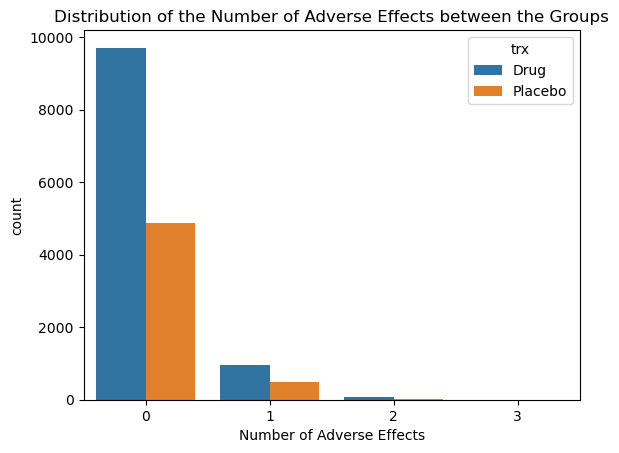

In [19]:

plot_num_eff = sns.countplot(data = drug_safety,x = 'num_effects', hue = 'trx')
plt.xlabel("Number of Adverse Effects")
plt.title('Distribution of the Number of Adverse Effects between the Groups')
plt.show()

In [20]:
# two samples proprotion z test

drug_successes_list = list(drug_safety['adverse_effects'][(drug_safety['adverse_effects'] == 'No' ) & (drug_safety['trx'] == 'Drug')])
total_drug_test_list = list(drug_safety['adverse_effects'][drug_safety['trx'] == 'Drug'])
placebo_successes_list = list(drug_safety['adverse_effects'][(drug_safety['adverse_effects'] == 'No' ) & (drug_safety['trx'] == 'Placebo')])
total_placebo_test_list = list(drug_safety['adverse_effects'][drug_safety['trx'] == 'Placebo'])

print(drug_successes_list[100:120])
print(lines)
print(len(placebo_successes_list))
print(lines)
print(len(total_drug_test_list))
print(lines)
print(total_placebo_test_list[50:70])

['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No']

_____________________________________________________________________________________________________________________

4864

_____________________________________________________________________________________________________________________

10727

_____________________________________________________________________________________________________________________

['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No']


In [21]:
no_of_success = [len(drug_successes_list), len(placebo_successes_list)]
no_of_trials = [len(total_drug_test_list), len(total_placebo_test_list)]
z_score, p_value = proportions_ztest(count=no_of_success, nobs=no_of_trials, alternative = 'two-sided')
print('Zscore:', z_score, '\np_value:', p_value)

Zscore: -0.04521826844949136 
p_value: 0.9639333330262497


In [22]:
expected, observed, stats = pingouin.chi2_independence(data = drug_safety, x = 'num_effects', y = 'trx', correction = False)
print(stats, lines, expected,lines,observed)
pearson_var = stats[stats['test'] == 'pearson']
print(lines,lines, pearson_var)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  1.799644  3.0  0.615012  0.010572  0.176275
1        cressie-read  0.666667  1.836006  3.0  0.607131  0.010678  0.179153
2      log-likelihood  0.000000  1.922495  3.0  0.588648  0.010926  0.186033
3       freeman-tukey -0.500000  2.001752  3.0  0.572043  0.011149  0.192379
4  mod-log-likelihood -1.000000  2.096158  3.0  0.552690  0.011409  0.199984
5              neyman -2.000000  2.344303  3.0  0.504087  0.012066  0.220189 
_____________________________________________________________________________________________________________________
 trx                 Drug      Placebo
num_effects                          
0            9703.794883  4863.205117
1             960.587096   481.412904
2              58.621126    29.378874
3               3.996895     2.003105 
________________________________________________________________________________________________________________

/home/kwesi/anaconda3/envs/condaenv1/lib/python3.10/site-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/home/kwesi/anaconda3/envs/condaenv1/lib/python3.10/site-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")


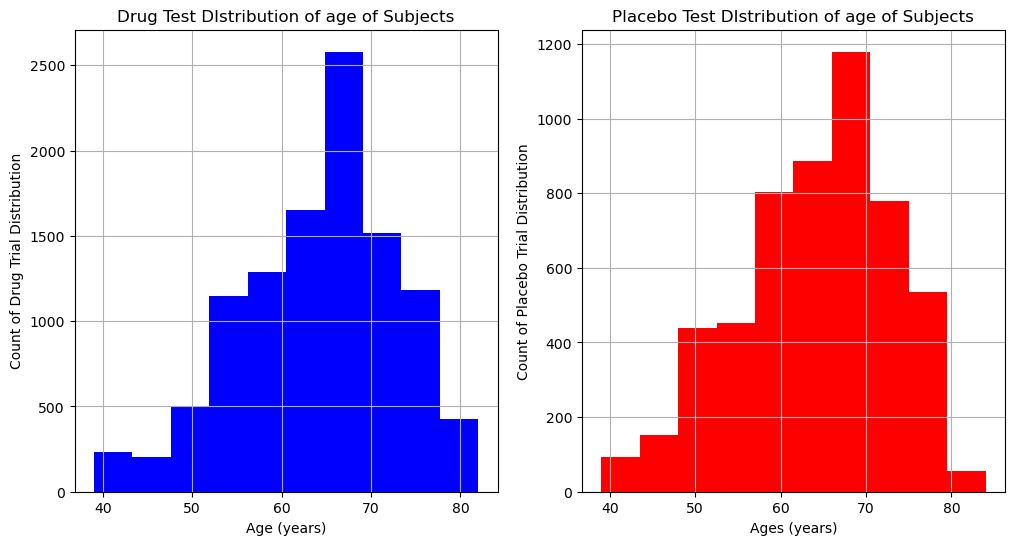

In [23]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
drug_safety[drug_safety['trx'] == 'Drug']['age'].hist(ax=ax[0], color = 'b')
drug_safety[drug_safety['trx'] == 'Placebo']['age'].hist(ax=ax[1], color = 'r')
ax[0].set_xlabel('Age (years)')
ax[1].set_xlabel('Ages (years)')
ax[0].set_ylabel('Count of Drug Trial Distribution')
ax[1].set_ylabel('Count of Placebo Trial Distribution')
ax[1].set_title('Placebo Test DIstribution of age of Subjects')
ax[0].set_title('Drug Test DIstribution of age of Subjects')
plt.show()

In [24]:
# Select the age of the Drug group
age_trx = drug_safety.loc[drug_safety["trx"] == "Drug", "age"]

# Select the age of the Placebo group
age_placebo = drug_safety.loc[drug_safety["trx"] == "Placebo", "age"]


two_ind_samp_results = pingouin.mwu(age_trx, age_placebo).round(3)
two_ind_samp_results

,U-val,alternative,p-val,RBC,CLES
MWU,29149339.5,two-sided,0.257,-0.011,0.505


P-value greater than 0.05. Failed to reject the Null Hypothesis